In [4]:
from skimage.io import imread,imshow,imsave
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [5]:
im=imread('etretat.jpg')

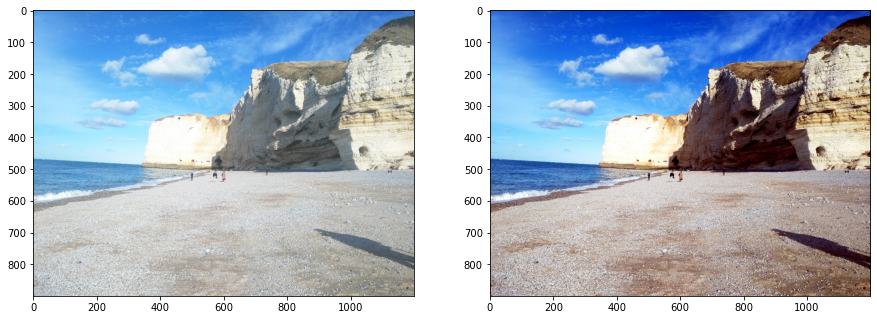

In [6]:
#histogram cumulative
def cumul_hist(im):
    cumul_hist = np.zeros((256,))
    c = 0
    for v in range(256):
        c += (im==v).sum()
        cumul_hist[v] = c
    cumul_hist /= cumul_hist.max()
    return cumul_hist


hist_list=[]

#Appliquer sur les 3 channels
for i in range(3):
    hist=cumul_hist(im[:,:,i])
    hist_list.append(hist)
hist_array=np.array(hist_list)



Tmin_list=[]
for i in range(3):
    for v in range(256):
        if hist_array[i][v]>0.02:break
    Tmin=v-1
    Tmin_list.append(Tmin)

Tmax_list=[]
for i in range(3):
    for v in range(256):
        if hist_array[i][255-v]<0.98:break
    Tmax=(255-v)+1
    Tmax_list.append(Tmax)

#Autolevels
LUT_list=[]
for i in range(3):
    LUT=np.arange(256)
    LUT[:Tmin_list[i]]=0
    LUT[Tmax_list[i]:]=255
    LUT[Tmin_list[i]:Tmax_list[i]]=(255/(Tmax_list[i]-Tmin_list[i]))*(LUT[Tmin_list[i]:Tmax_list[i]]-Tmin_list[i])
    LUT_list.append(LUT)
    
LUT_list_array=np.array(LUT_list)


im1=im.copy()
for i in range(3):
    im1[:,:,i]=LUT_list_array[i][im[:,:,i]]

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im1)
plt.show()

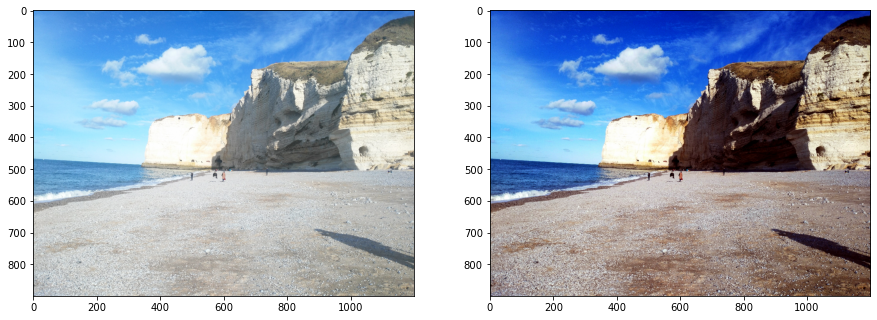

In [8]:
#gamma correction
def lut_gamma(gamma):
    lut = np.power(np.arange(0,256),gamma) * np.power(255,1-gamma)
    return lut 

im2=lut_gamma(1.3)[im1]/256


plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im2)

plt.show()

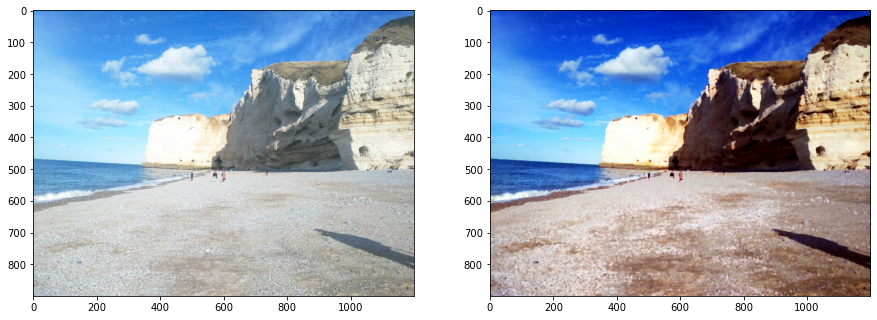

In [12]:
from skimage.color import rgb2hsv,hsv2rgb
from skimage.morphology import disk
from skimage.morphology import opening,closing,erosion,dilation
#Morphomathematical operators
hsv = rgb2hsv(im2)

se = disk(2)
hsv[:,:,2] = opening(closing(hsv[:,:,2],se),se)
im3 = hsv2rgb(hsv)


plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im3)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


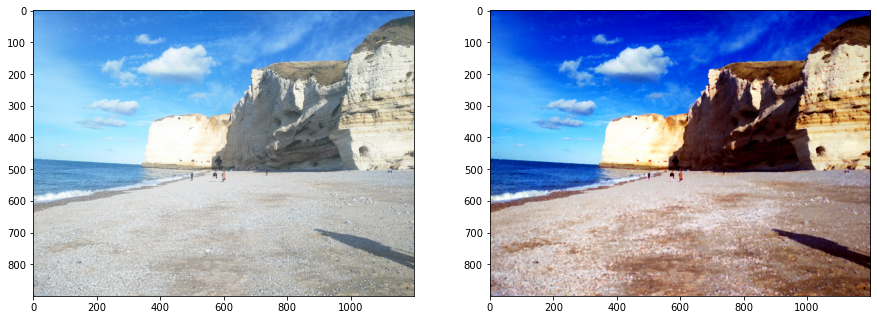

In [13]:
#Saturation
hsv = rgb2hsv(im3)

alpha=1.2
hsv[:,:,1] *=alpha 
im4 = hsv2rgb(hsv)


plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im4)

plt.show()